In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

R0safe=2.0 R0risky=4.5


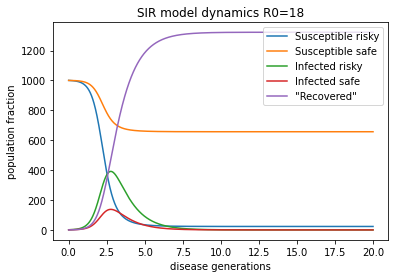

In [30]:
a = 0.05
b = 1
r = 0.05
c = 0.02
Nr = 1000
Ns = 1000
epsilon = 1
time_limit = 20
granularity = 1000
T = np.linspace(0, time_limit, granularity)
X0 = [Nr, Ns, epsilon, epsilon, 0]


R0safe = a * c * (Nr + Ns) / b
R0risky = a * r * Nr / b + (a * c * (Nr + Ns)) / b
print(f'R0safe={R0safe} R0risky={R0risky}')

def model(X, _):
    Sr, Ss, Ir, Is, R = X
    dSrdT = - (a * r * Ir * Sr) - (a * c * Sr * (Ir + Is))
    dSsdT = - (a * c * Sr * (Ir + Is))
    dIrdT = (a * r * Ir * Sr)  + (a * c * Sr * (Ir + Is)) - b*Ir
    dIsdT = (a * c * Sr * (Ir + Is)) - b*Is
    dRdT =  b*Ir + b*Is
    
    return [dSrdT, dSsdT, dIrdT, dIsdT, dRdT]

solution = odeint(model, X0, T)

plt.plot(T, solution[:, 0], label="Susceptible risky")
plt.plot(T, solution[:, 1], label="Susceptible safe")
plt.plot(T, solution[:, 2], label="Infected risky")
plt.plot(T, solution[:, 3], label="Infected safe")
plt.plot(T, solution[:, 4], label='"Recovered"')

plt.xlabel('disease generations')
plt.ylabel('population fraction')
plt.title(f'SIR model dynamics R0={R0}')
plt.legend()